In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
plt.style.use('seaborn-darkgrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
new_df=pd.read_csv('/content/drive/MyDrive/assignment-data (1).csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
new_df=new_df.drop(columns=['datetime','Unnamed: 0'])

In [5]:
new_df

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,803.22270,10.45800,10.45800,0.955500,8.946000,0.000000,0.00000,2018-01-01
1,774.89523,10.32675,10.32675,0.961625,8.911875,0.000000,0.00000,2018-01-01
2,731.46927,10.19550,10.19550,0.967750,8.877750,0.000000,0.00000,2018-01-01
3,713.93870,10.06425,10.06425,0.973875,8.843625,0.000000,0.00000,2018-01-01
4,699.23007,9.93300,9.93300,0.980000,8.809500,0.000000,0.00000,2018-01-01
...,...,...,...,...,...,...,...,...
103387,858.50000,17.79750,17.79750,0.756000,12.400500,1.950375,0.16275,2020-12-12
103388,832.24000,17.66100,17.66100,0.756000,12.264000,2.047500,0.14700,2020-12-12
103389,804.97000,17.46675,17.46675,0.758625,12.127500,2.144625,0.11550,2020-12-12
103390,763.56000,17.27250,17.27250,0.761250,11.991000,2.241750,0.08400,2020-12-12


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Check correlation strength among different attribute

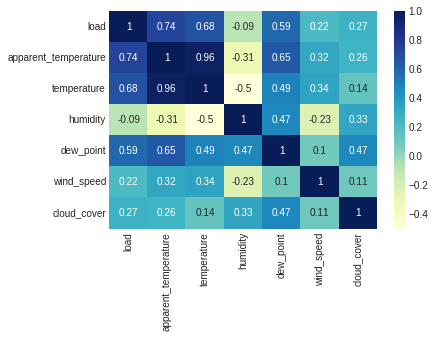

In [7]:
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)

Visualise the scatter plot to check collinearity anomg pair of attributes

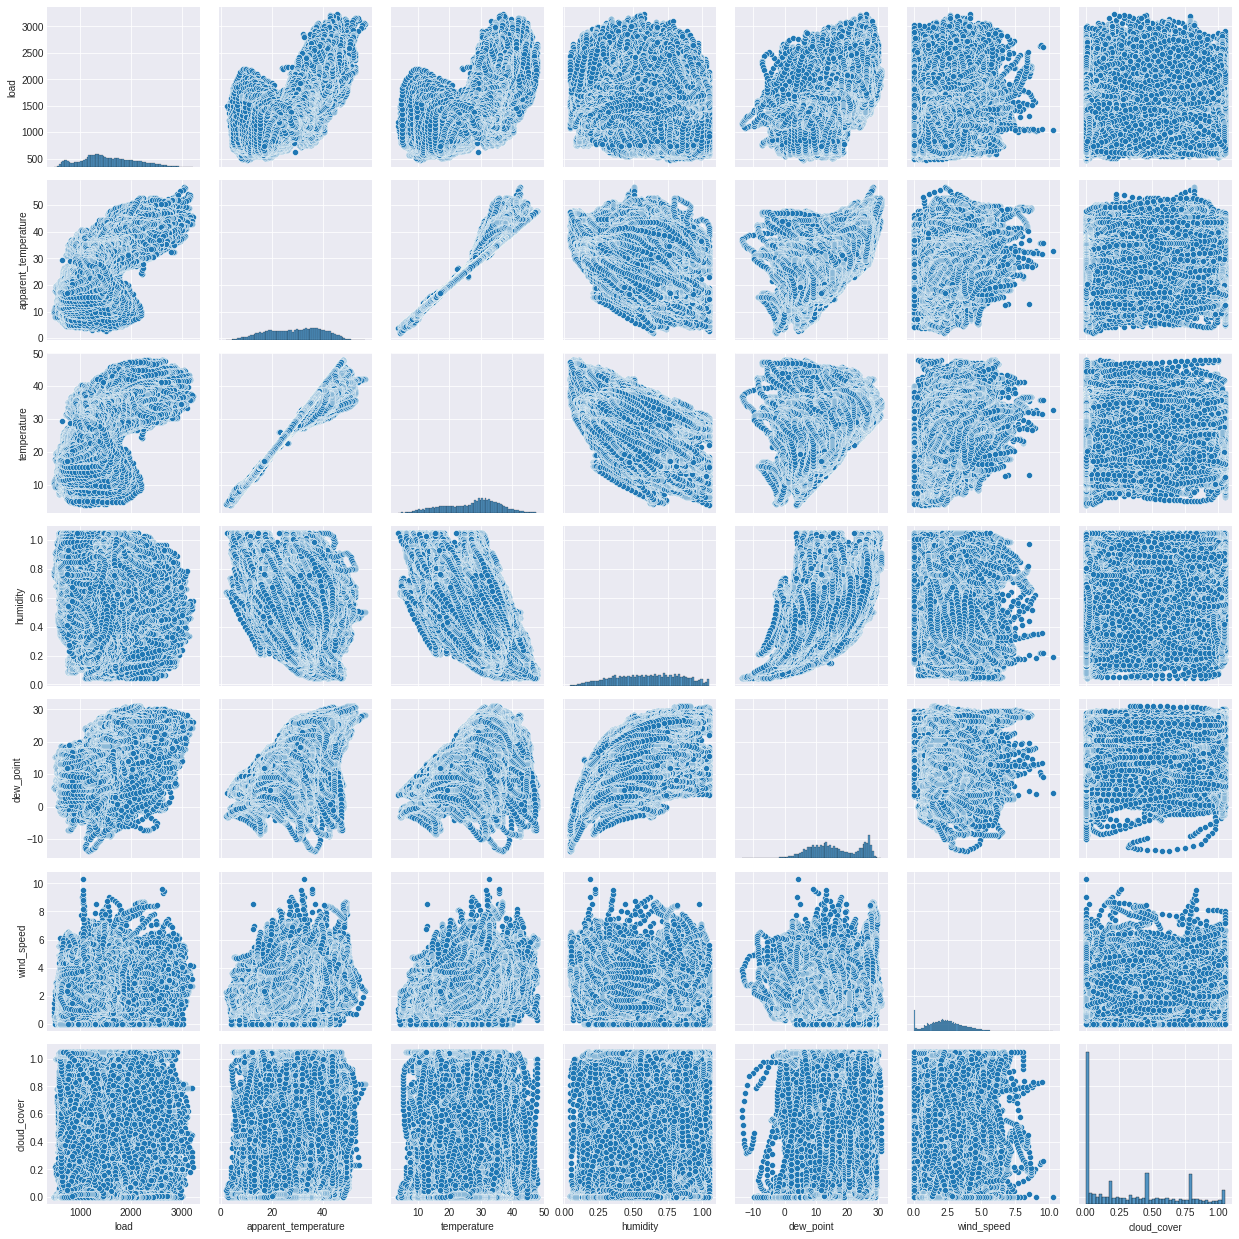

In [8]:
sns.pairplot(new_df,kind='scatter')
# to show
plt.show()

Find missing value and find 1440 data point is missing in load attributes

In [15]:
new_df.isnull().sum()

load                    1440
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_speed                 0
cloud_cover                0
date                       0
dtype: int64

Visualise the missing value in heatmap pattern and find few few data point is missing in load variable 

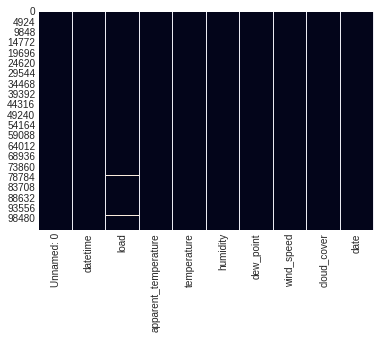

In [20]:
sns.heatmap(df.isnull(), cbar=False)

Missing datapoint in load variale with its count and datetime

In [19]:
df[df.isna().any(axis=1)].date.value_counts()

2019-07-17    96
2019-07-16    96
2019-07-15    96
2019-10-27    96
2020-10-05    96
2020-10-07    96
2019-05-17    96
2020-03-22    96
2020-10-06    96
2019-05-16    96
2019-12-31    96
2020-01-01    96
2019-05-18    96
2019-07-18    96
2019-05-19    96
Name: date, dtype: int64

Missing datapoint with date and timespan

In [21]:
df[df.isnull().any(axis=1)].datetime.value_counts()

2020-10-07 03:45:00    1
2020-03-22 06:30:00    1
2019-07-16 09:30:00    1
2019-10-27 11:15:00    1
2019-07-16 05:00:00    1
                      ..
2019-07-16 11:00:00    1
2019-12-31 02:30:00    1
2020-10-06 10:45:00    1
2019-07-16 23:15:00    1
2019-05-19 05:15:00    1
Name: datetime, Length: 1440, dtype: int64

In [8]:
df=pd.read_csv('/content/drive/MyDrive/assignment-data (1).csv')

In [9]:
df.head()

,Unnamed: 0,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
1,1,2018-01-01 00:15:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2,2,2018-01-01 00:30:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
3,3,2018-01-01 00:45:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
4,4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


In [10]:
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [11]:
mean = np.mean(df['load'])
mean

1558.9643301515305

In [12]:
def drop_utc(string):
    return string[:-6]

In [13]:
df['datetime'] = df['datetime'].apply(lambda x: drop_utc(x))

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [15]:
type(df.loc[0, 'datetime'])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df['datetime'].dtype

dtype('<M8[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   datetime              103392 non-null  datetime64[ns]
 1   load                  101952 non-null  float64       
 2   apparent_temperature  103392 non-null  float64       
 3   temperature           103392 non-null  float64       
 4   humidity              103392 non-null  float64       
 5   dew_point             103392 non-null  float64       
 6   wind_speed            103392 non-null  float64       
 7   cloud_cover           103392 non-null  float64       
 8   date                  103392 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 7.1+ MB


In [18]:

df.head()

,datetime,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,date
0,2018-01-01 00:00:00,803.22270,10.45800,10.45800,0.955500,8.946000,0.0,0.0,2018-01-01
1,2018-01-01 00:00:00,774.89523,10.32675,10.32675,0.961625,8.911875,0.0,0.0,2018-01-01
2,2018-01-01 00:00:00,731.46927,10.19550,10.19550,0.967750,8.877750,0.0,0.0,2018-01-01
3,2018-01-01 00:00:00,713.93870,10.06425,10.06425,0.973875,8.843625,0.0,0.0,2018-01-01
4,2018-01-01 01:00:00,699.23007,9.93300,9.93300,0.980000,8.809500,0.0,0.0,2018-01-01


Modify our dataframe for exploratory data analysis and finds some insights and as time span is very short which is 15 miniutes and ery less variation in datapoint in short span  so we convert it to 1 hour for better visualisation and take the mean of corresponding attributes

In [19]:
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Hour'] = df['datetime'].dt.hour
df['Day_of_week'] = df['datetime'].dt.dayofweek
df['Day_of_month'] = df['datetime'].dt.day
df['Day_of_year'] = df['datetime'].dt.dayofyear

We change timespan of 15 minutes to 1 hours to decrese datapoint for better visualization and insights

In [20]:
df = df.groupby('datetime').mean()
df = df.asfreq('H', method='pad')

In [48]:
df.head()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
datetime,,,,,,,,,,,,,
2018-01-01 00:00:00,755.881475,10.261125,10.261125,0.964688,8.894813,0.000000,0.0,2018,1,0,0,1,1
2018-01-01 01:00:00,683.549567,9.736125,9.736125,0.989187,8.758313,0.000000,0.0,2018,1,1,0,1,1
2018-01-01 02:00:00,644.442368,9.211125,9.211125,1.013688,8.621813,0.000000,0.0,2018,1,2,0,1,1
2018-01-01 03:00:00,643.879293,8.656594,8.749125,1.025063,8.349469,0.263813,0.0,2018,1,3,0,1,1
2018-01-01 04:00:00,667.969812,8.052844,8.392125,1.014563,7.850719,0.967313,0.0,2018,1,4,0,1,1


Descriptive Analysis of dataset of load variable

In [43]:
load_mwh = pd.Series(df['load'])
load_mwh
load_mwh_df = pd.DataFrame(load_mwh)
load_mwh_df.describe()

,load
count,25488.000000
mean,1558.964330
std,530.204844
min,486.844493
25%,1187.027119
50%,1495.476700
75%,1936.918663
max,3210.696575


Plot Each atrributes in time series scale and find no trend but cyclicity and seasonility


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb20560710>,
      dtype=object)

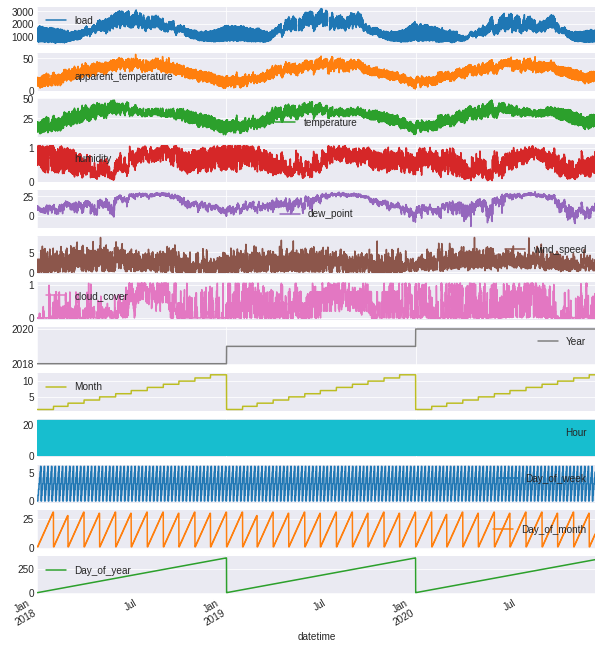

In [27]:
dff.plot(subplots=True, figsize=(10, 12))

<BarContainer object of 36 artists>

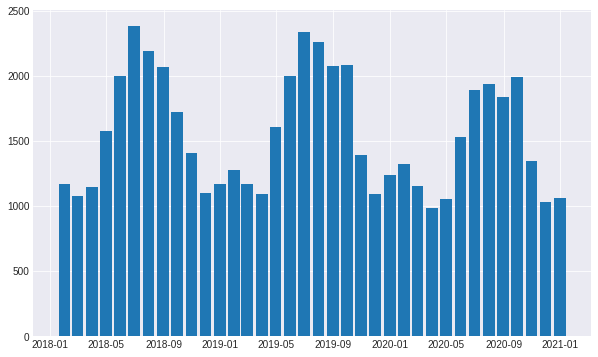

In [28]:
df_month = df.resample("M").mean()
  
# using subplot
fig, ax = plt.subplots(figsize=(10, 6))
  
# plotting bar graph
ax.bar(df_month['2018':].index, 
       df_month.loc['2018':, "load"], 
       width=25, align='center')

Check daily fluctuation of load and find some pattern in day and night like peak at afternoon 


Annual mean demand of three year and find there is no trend as mean is increases yhen decreases

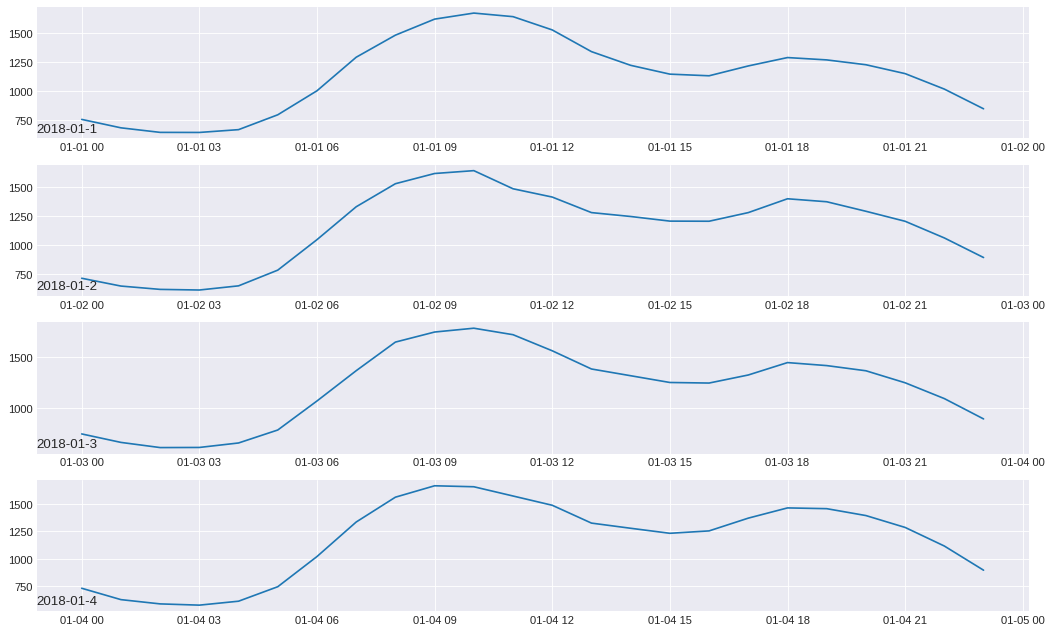

In [37]:
days = [x for x in range(1, 5)]
pyplot.figure(figsize=(16, 10), dpi=80)
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2018-01-' + str(days[i])
	# get all observations for the day
	result = df[day]
	# plot the active power for the day
	pyplot.plot(result['load'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

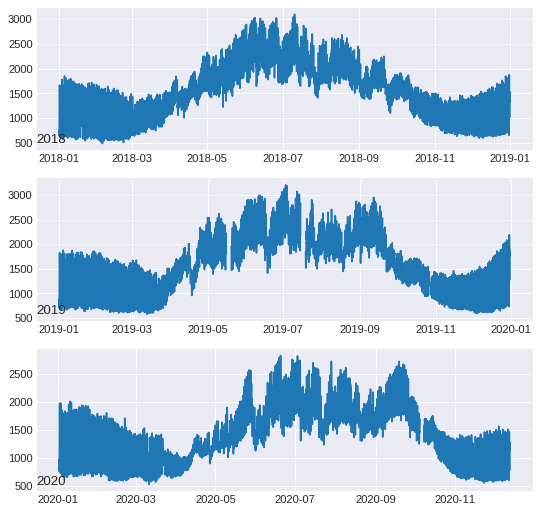

In [38]:
years = ['2018', '2019', '2020']
pyplot.figure(figsize=(8, 8), dpi=80)
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = df[str(year)]
	# plot the active power for the year
	pyplot.plot(result['load'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

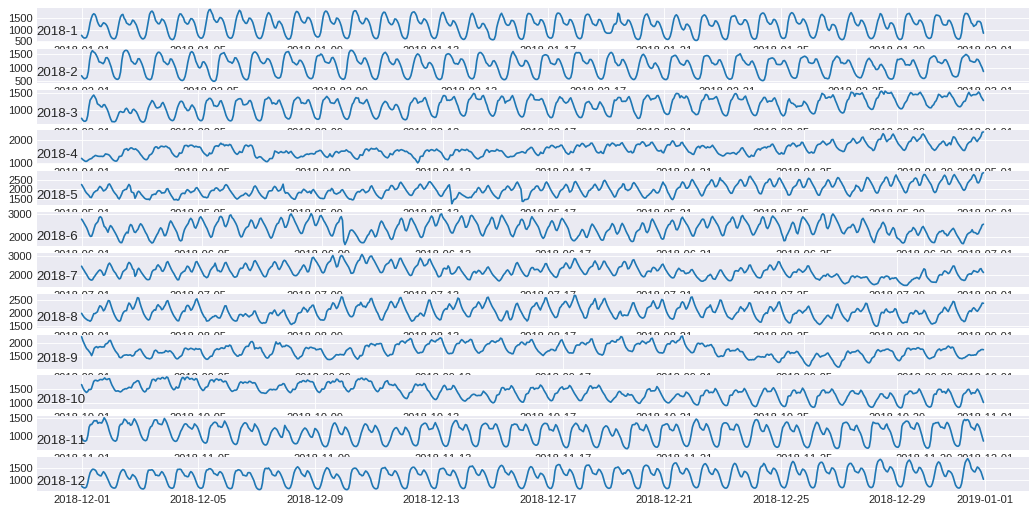

In [39]:
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(16, 8), dpi=80)
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2018-' + str(months[i])
	# get all observations for the month
	result = df[month]
	# plot the active power for the month
	pyplot.plot(result['load'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

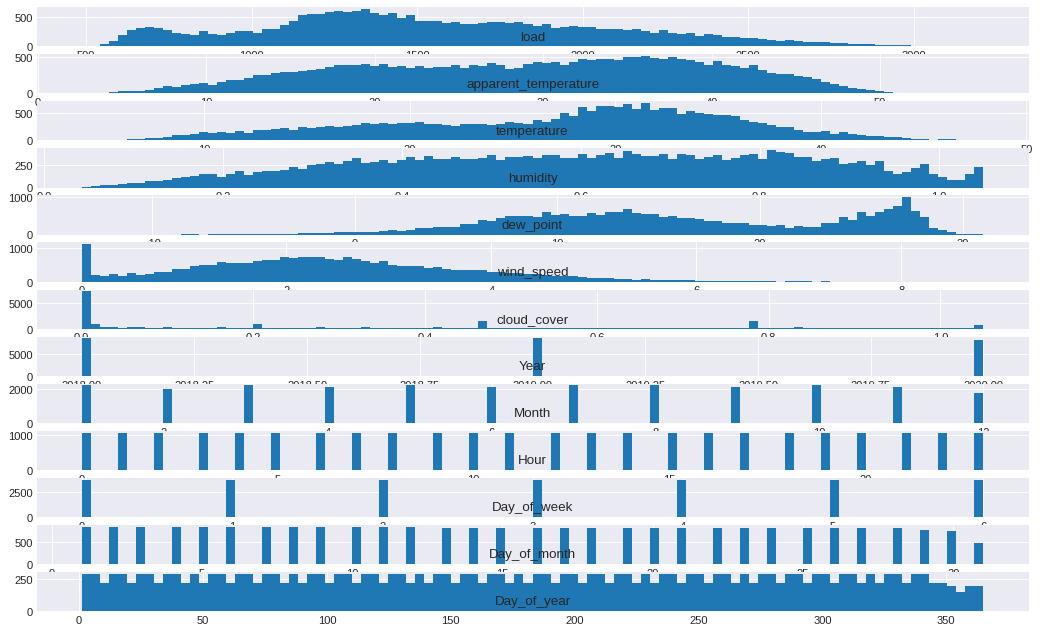

In [40]:
pyplot.figure(figsize=(16, 10), dpi=80)
for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	df[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

In [23]:
annual_means = load_mwh.resample('Y').mean()
annual_means

datetime
2018-12-31    1588.274058
2019-12-31    1630.520712
2020-12-31    1453.407119
Freq: A-DEC, Name: load, dtype: float64

datetime
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: load, dtype: object

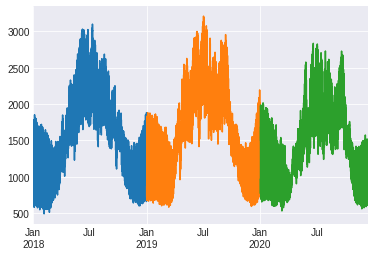

In [24]:
annual_means = load_mwh.resample('Y').plot()
annual_means

Quaterly mean demand of of each year and find there is seasonilty in every year

In [ ]:
quarterly_means = load_mwh.resample('Q-JUL').mean()
quarterly_means

datetime
2018-01-31    1173.465359
2018-04-30    1269.057719
2018-07-31    2190.841723
2018-10-31    1736.010518
2019-01-31    1182.262742
2019-04-30    1292.243160
2019-07-31    2205.018888
2019-10-31    1856.421000
2020-01-31    1220.315721
2020-04-30    1062.835298
2020-07-31    1787.450887
2020-10-31    1734.988895
2021-01-31    1043.147346
Freq: Q-JUL, Name: load, dtype: float64

datetime
2018-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2018-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: Q-JUL, Name: load, dtype: object

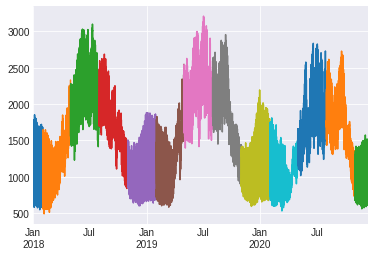

In [ ]:
quarterly_means = load_mwh.resample('Q-JUL').plot()
quarterly_means

In [ ]:
Monthly_means = load_mwh.resample('M').mean()
Monthly_means

datetime
2018-01-31    1173.465359
2018-02-28    1078.389384
2018-03-31    1145.641344
2018-04-30    1574.545085
2018-05-31    2000.568079
2018-06-30    2387.110413
2018-07-31    2191.177926
2018-08-31    2070.278479
2018-09-30    1727.222045
2018-10-31    1410.247530
2018-11-30    1097.836327
2018-12-31    1167.450717
2019-01-31    1278.777750
2019-02-28    1173.908325
2019-03-31    1091.006743
2019-04-30    1610.633303
2019-05-31    2000.673007
2019-06-30    2340.436661
2019-07-31    2258.900576
2019-08-31    2079.410325
2019-09-30    2086.037240
2019-10-31    1396.382459
2019-11-30    1096.385292
2019-12-31    1237.854828
2020-01-31    1326.707042
2020-02-29    1151.234733
2020-03-31     988.203446
2020-04-30    1052.014362
2020-05-31    1528.024188
2020-06-30    1895.442778
2020-07-31    1942.369306
2020-08-31    1838.153040
2020-09-30    1993.165671
2020-10-31    1344.153475
2020-11-30    1034.146867
2020-12-31    1065.648541
Freq: M, Name: load, dtype: float64

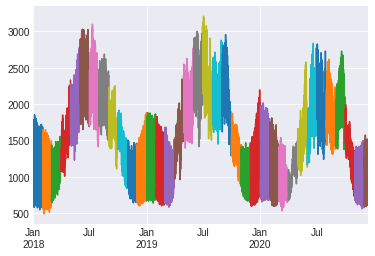

In [ ]:
monthly_means = load_mwh.resample('M').plot()

In [ ]:
def plot_timeseries(ax, series, title=None, label=None):
    ax.plot(series, label=label)
    ax.set_title(title)

There is not trend yearly as visualize in plot

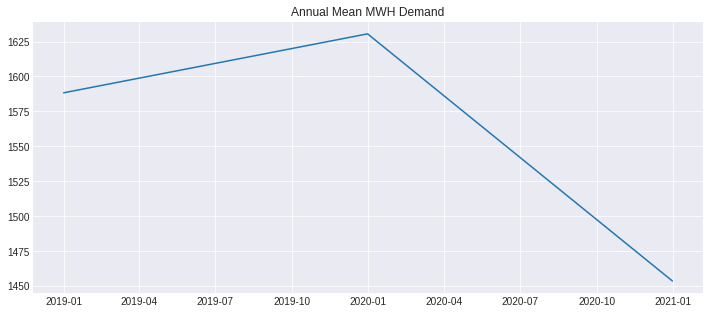

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_timeseries(ax, annual_means, 'Annual Mean MWH Demand')
plt.show()

Clearly in quaterly plot seasonility in dataset maximum demand in nealy july month in every year

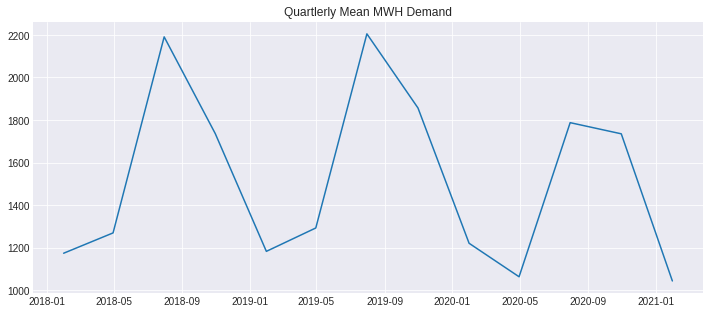

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_timeseries(ax, quarterly_means, 'Quartlerly Mean MWH Demand')
plt.show()

In [ ]:
monthly_means = load_mwh.resample('M').mean()

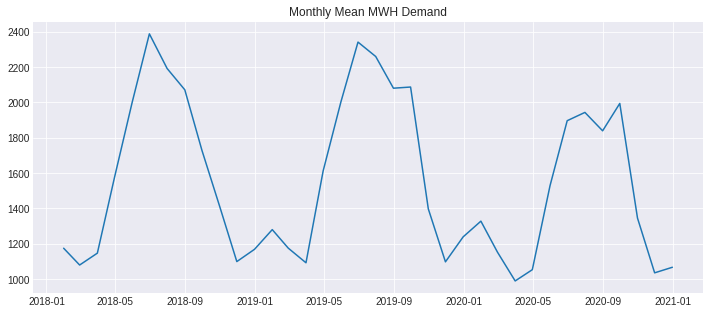

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_timeseries(ax, monthly_means, 'Monthly Mean MWH Demand')
plt.show()

In [ ]:
weekly_means = load_mwh.resample('W').mean()

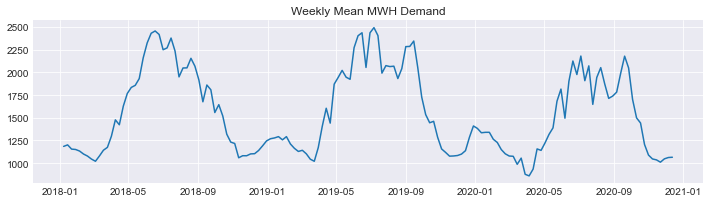

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
plot_timeseries(ax, weekly_means, 'Weekly Mean MWH Demand')
plt.show()

In [ ]:
daily_means = mwh.resample('D').mean()

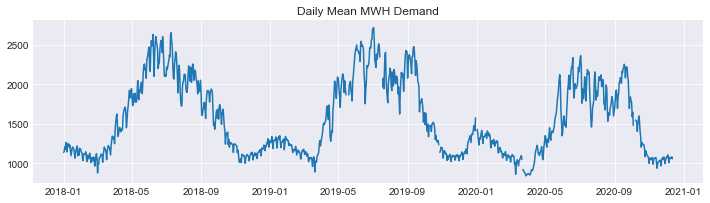

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, daily_means, 'Daily Mean MWH Demand')
plt.show()

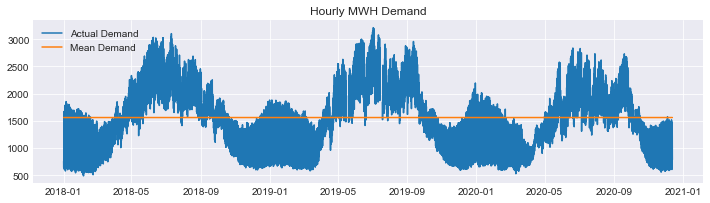

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh, 'Hourly MWH Demand', 'Actual Demand')
ax.plot(mwh.index, [np.mean(mwh)]*len(mwh), label='Mean Demand')
ax.legend()
plt.show()

In [ ]:
mwh_2018 = mwh.loc['2018-01-01 00:00:00':'2018-12-31 23:00:00']
mwh_2018

datetime
2018-01-01 00:00:00     755.881475
2018-01-01 01:00:00     683.549567
2018-01-01 02:00:00     644.442368
2018-01-01 03:00:00     643.879293
2018-01-01 04:00:00     667.969812
                          ...     
2018-12-31 19:00:00    1498.021900
2018-12-31 20:00:00    1425.347350
2018-12-31 21:00:00    1334.422100
2018-12-31 22:00:00    1173.463450
2018-12-31 23:00:00    1023.864017
Freq: H, Name: load, Length: 8760, dtype: float64

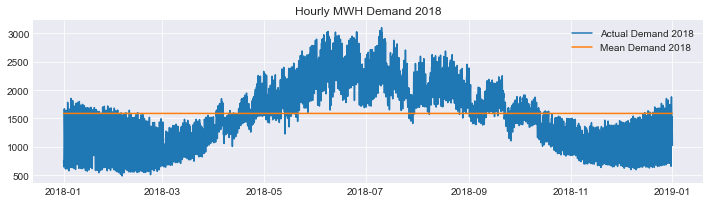

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2018, 'Hourly MWH Demand 2018', 'Actual Demand 2018')
ax.plot(mwh_2018.index, [np.mean(mwh_2018)]*len(mwh_2018), label='Mean Demand 2018')
ax.legend()
# fig.savefig('../images/eda/hourly_2017.png', dpi=400)
plt.show()

In [ ]:
mwh_2018_july = mwh.loc['2018-07-01 00:00:00':'2018-07-31 23:00:00']
mwh_2018_july

datetime
2018-07-01 00:00:00    2458.340000
2018-07-01 01:00:00    2332.342500
2018-07-01 02:00:00    2233.362500
2018-07-01 03:00:00    2118.475000
2018-07-01 04:00:00    2020.000000
                          ...     
2018-07-31 19:00:00    2167.858950
2018-07-31 20:00:00    2296.300650
2018-07-31 21:00:00    2328.772150
2018-07-31 22:00:00    2197.297925
2018-07-31 23:00:00    2116.694875
Freq: H, Name: load, Length: 744, dtype: float64

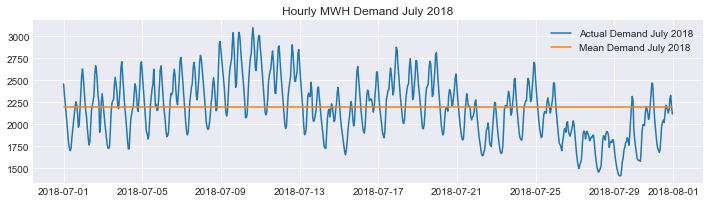

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
plot_timeseries(ax, mwh_2018_july, 'Hourly MWH Demand July 2018', 'Actual Demand July 2018')
ax.plot(mwh_2018_july.index, [np.mean(mwh_2018_july)]*len(mwh_2018_july), label='Mean Demand July 2018')
ax.legend()
# fig.savefig('../images/eda/hourly_july_2017.png', dpi=400)
plt.show()

C:\new anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


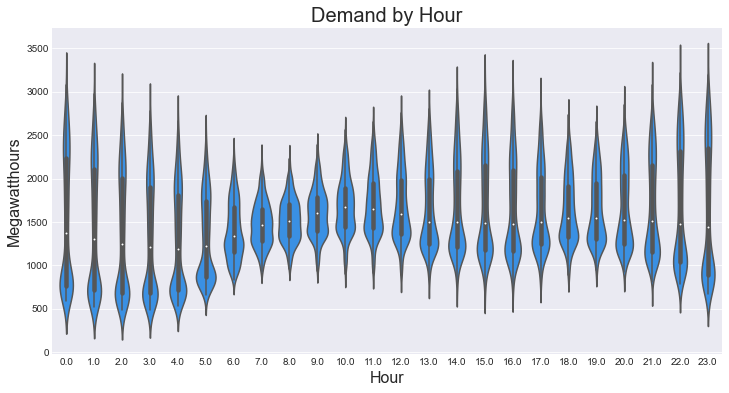

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.color_palette(n_colors=1)
sns.violinplot(df['Hour'],df['load'], color='dodgerblue')
ax.set_title('Demand by Hour', size=20)
ax.set_ylabel('Megawatthours', size=16)
ax.set_xlabel('Hour', size=16)
#ax.xticks()
fig.savefig('E:\ElectricityDemandForecasting-master\eda', dpi=500)
plt.show()

C:\new anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


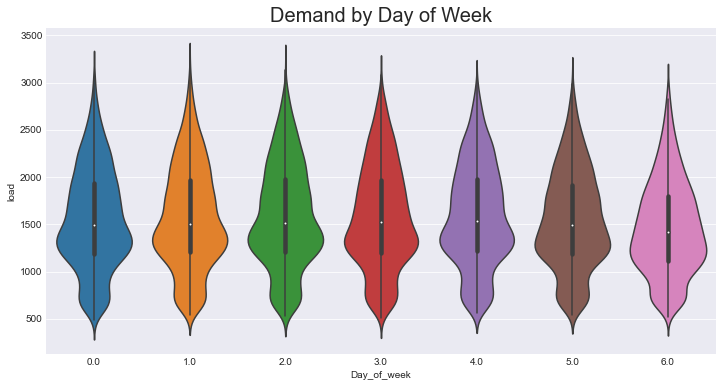

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(df['Day_of_week'], df['load'])
ax.set_title('Demand by Day of Week', size=20)
fig.savefig('E:\ElectricityDemandForecasting-master\ElectricityDemandForecasting-master', dpi=400)


plt.show()

C:\new anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


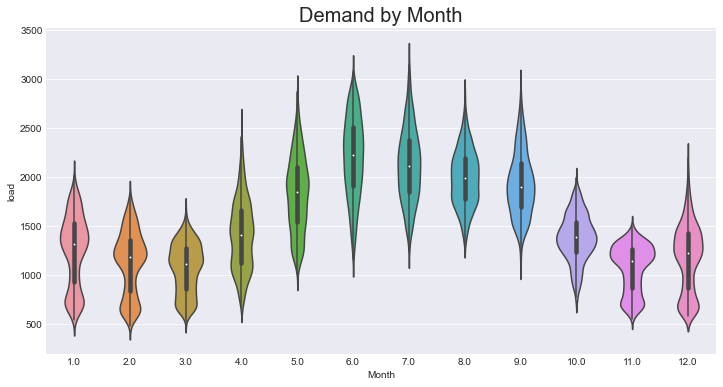

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(df['Month'], df['load'])
ax.set_title('Demand by Month', size=20)
fig.savefig('E:\ElectricityDemandForecasting-master\eda', dpi=400)
plt.show()

In [ ]:
df.head()

,load,apparent_temperature,temperature,humidity,dew_point,wind_speed,cloud_cover,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
datetime,,,,,,,,,,,,,
2018-01-01 00:00:00,755.881475,10.261125,10.261125,0.964688,8.894813,0.000000,0.0,2018.0,1.0,0.0,0.0,1.0,1.0
2018-01-01 01:00:00,683.549567,9.736125,9.736125,0.989187,8.758313,0.000000,0.0,2018.0,1.0,1.0,0.0,1.0,1.0
2018-01-01 02:00:00,644.442368,9.211125,9.211125,1.013688,8.621813,0.000000,0.0,2018.0,1.0,2.0,0.0,1.0,1.0
2018-01-01 03:00:00,643.879293,8.656594,8.749125,1.025062,8.349469,0.263813,0.0,2018.0,1.0,3.0,0.0,1.0,1.0
2018-01-01 04:00:00,667.969812,8.052844,8.392125,1.014563,7.850719,0.967313,0.0,2018.0,1.0,4.0,0.0,1.0,1.0


In [ ]:
mw_by_hour = pd.Series(df.groupby('Hour').mean('load')['load'])
mw_by_hour

Hour
0.0     1511.576679
1.0     1424.105183
2.0     1356.747039
3.0     1305.397102
4.0     1283.064763
5.0     1314.445514
6.0     1408.982164
7.0     1480.142090
8.0     1525.816123
9.0     1604.891384
10.0    1682.897690
11.0    1698.545539
12.0    1683.356094
13.0    1637.305665
14.0    1666.305390
15.0    1672.642442
16.0    1644.148170
17.0    1634.915823
18.0    1628.817630
19.0    1639.053143
20.0    1651.676661
21.0    1663.779642
22.0    1674.751667
23.0    1621.780325
Name: load, dtype: float64

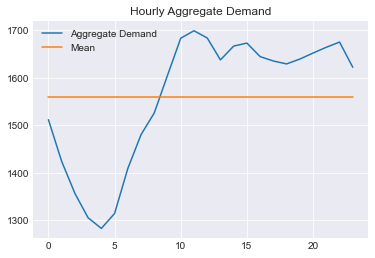

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_timeseries(ax, mw_by_hour, 'Hourly Aggregate Demand', 'Aggregate Demand')
ax.plot(mw_by_hour.index, [np.mean(mw_by_hour)]*len(mw_by_hour), label='Mean')
ax.legend()
plt.show()

In [ ]:
def plot_agg_demand(ax, df, col, title=None):
    agg_dem = pd.Series(df.groupby(col).mean('load')['load'])
    plot_timeseries(ax, agg_dem, title, 'Aggregate Demand')
    ax.plot(agg_dem.index, [np.mean(agg_dem)]*len(agg_dem), label='Mean')

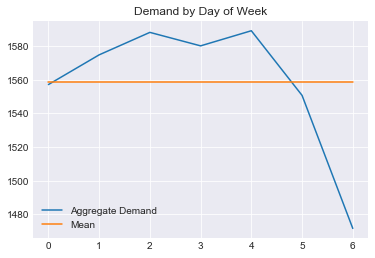

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, df, 'Day_of_week', 'Demand by Day of Week')
ax.legend()
plt.show()

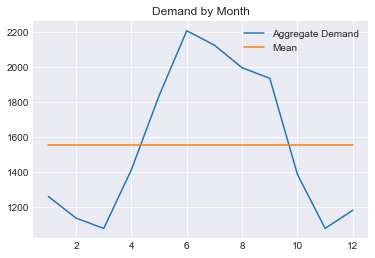

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, df, 'Month', 'Demand by Month')
ax.legend()
plt.show()

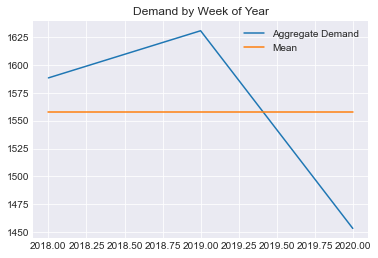

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, df, 'Year', 'Demand by Week of Year')
ax.legend()
plt.show()

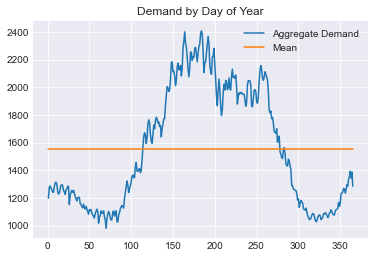

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, df, 'Day_of_year', 'Demand by Day of Year')
ax.legend()
plt.show()

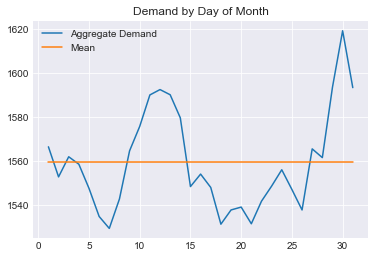

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_agg_demand(ax, df, 'Day_of_month', 'Demand by Day of Month')
ax.legend()
plt.show()

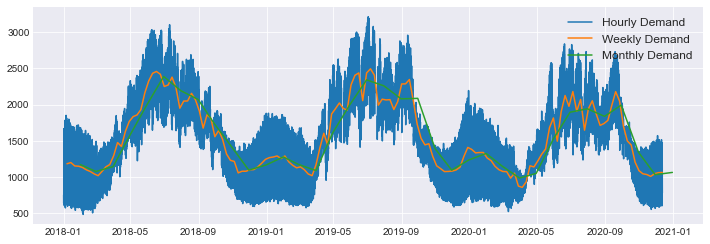

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, mwh, None, 'Hourly Demand')
plot_timeseries(ax, mwh.resample('W').mean(), None, 'Weekly Demand')
plot_timeseries(ax, mwh.resample('M').mean(), None, 'Monthly Demand')
ax.legend(fontsize=12)
fig.savefig('E:\ElectricityDemandForecasting-master\eda', dpi=400)
plt.show()